In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

In [139]:
credit=pd.read_csv('/Users/chriswoo/Downloads/creditcard-1.csv')
#dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3

In [205]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


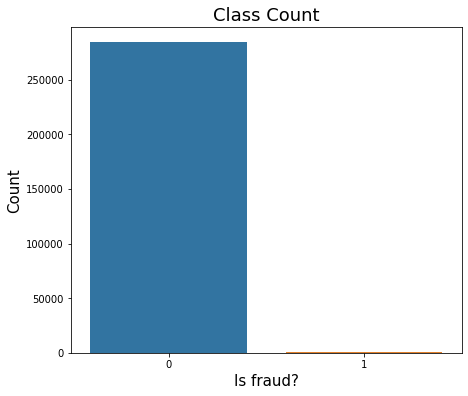

In [141]:
#the distrubotion of Class
plt.figure(figsize=(7,6))
sns.countplot(credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [142]:
#standardization and remove useless feature
from sklearn.preprocessing import StandardScaler
credit['Amount']=StandardScaler().fit_transform(credit['Amount'].values.reshape(-1,1))
credit=credit.drop(['Time'],axis=1)

# Make dataset balance 

In [355]:
credit.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Undersample

In [356]:
fruad_record_indices=np.array(credit[credit['Class']==1].index)
normal_record_indices=np.array(credit[credit['Class']==0].index)
#pick same amount of class is 0
random_normal_indices=np.random.choice(normal_record_indices,492)
#concarenate the indices
final_index=np.concatenate((fruad_record_indices,random_normal_indices))

In [357]:
under_sample=credit.iloc[final_index,:]

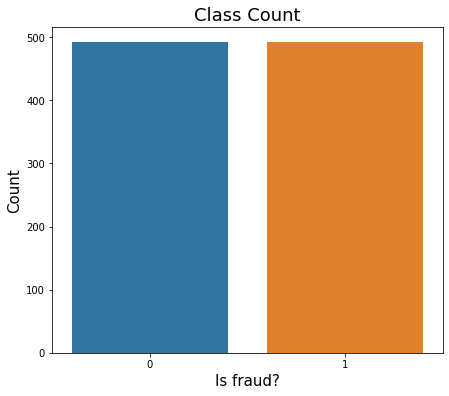

In [358]:
#the distrubotion of Class
plt.figure(figsize=(7,6))
sns.countplot(under_sample['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [359]:
X=under_sample.drop(['Class'],axis=1)
y=under_sample['Class']
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [360]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [361]:
lr=LogisticRegression(C=0.1,penalty='l1')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [362]:
recall=recall_score(y_test,lr.predict(X_test))
print('After undersamping recall is {}%'.format(round(recall*100,2)))

After undersamping recall is 90.53%


In [363]:
cm=confusion_matrix(y_test,y_pred)

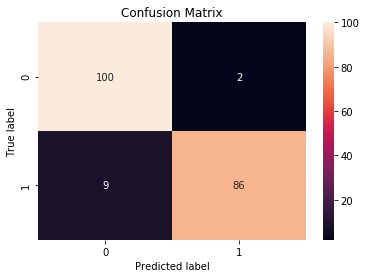

In [364]:
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [365]:
X=credit.drop(['Class'],axis=1)
y=credit['Class']

In [366]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [367]:
y_pred=lr.predict(X_test)
recall=recall_score(y_test,lr.predict(X_test))
print('orginal data test recall is {}%'.format(round(recall*100,2)))

orginal data test recall is 88.51%


In [368]:
cm_orginal=confusion_matrix(y_test,y_pred)


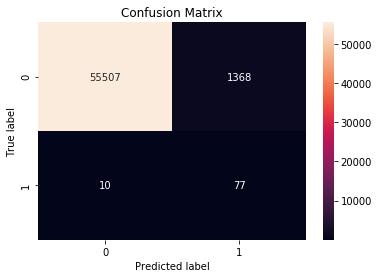

In [369]:
cm_df = pd.DataFrame(cm_orginal,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_orginal, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Oversampling

In [370]:
from imblearn.over_sampling import SMOTE

In [371]:
X=credit.drop(['Class'],axis=1)
y=credit['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [372]:
oversampler=SMOTE(random_state=1)

In [373]:
OS_X,OS_y=oversampler.fit_sample(X_train,y_train)
print('Length of class1 is {}'.format(len(OS_y[OS_y==1])))
print('Length of class0 is {}'.format(len(OS_y[OS_y==0])))

Length of class1 is 227440
Length of class0 is 227440


In [374]:
lr=LogisticRegression(C=0.1,penalty='l1',random_state=2)
lr.fit(OS_X,OS_y)
y_pred=lr.predict(X_test)

In [377]:
recall=recall_score(y_test,y_pred)
print('After oversampling recall is {}%'.format(round(recall*100,2)))

After oversampling recall is 88.51%


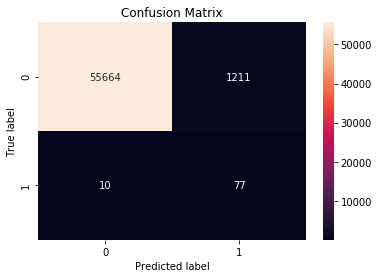

In [378]:
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()